In [2]:
#importing libraries for this project
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#readng data from directory
df= pd.read_csv(r'''C:\Users\USER\Desktop\dataset\nigeria_houses_data_excel.csv''')
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0,210000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000


In [4]:
#shape of our data.
df.shape

(24326, 9)

In [5]:
df.state.unique()

array(['Abuja', 'Lagos', 'Edo', 'Ogun', 'Oyo', 'Imo', 'Anambara',
       'Rivers', 'Enugu', 'Kaduna', 'Kwara', 'Nasarawa', 'Abia', 'Delta',
       'Akwa Ibom', 'Osun', 'Ekiti', 'Cross River', 'Kogi', 'Plateau',
       'Kano', 'Katsina', 'Bayelsa', 'Borno', 'Niger'], dtype=object)

In [6]:
# we'll be focusing mainly on abuja and lagos because they are the two main location which has the highest data points.
df1=df[df['state'].isin(['Abuja','Lagos'])]
df1.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
0,6,5,5,4,Detached Duplex,Mabushi,Abuja,450000000.0,210000000
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000


In [7]:
df1.shape

(21969, 9)

In [8]:
df1.state.unique()

array(['Abuja', 'Lagos'], dtype=object)

In [9]:
#value counts of the towns in lagos state
df1['town'][df['state']=='Lagos'].value_counts().head()

Lekki                   10841
Ajah                     2142
Ikoyi                    1541
Ikeja                     686
Victoria Island (VI)      493
Name: town, dtype: int64

In [10]:
#value counts of the towns in state state
df1['town'][df1['state']=='Abuja'].value_counts().head()

Gwarinpa            390
Life Camp           298
Guzape District     286
Katampe             256
Maitama District    252
Name: town, dtype: int64

In [11]:
#searching for missing values
df1.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
priceess         0
price            0
dtype: int64

In [12]:
# a little bit of outlier removal is done here. Houses which have more of bathrooms than bedrooms are filterd out.
df2 = df1[df1['bedrooms']<df1['bathrooms']+1]

In [13]:
df2.sample(5)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
7375,3,3,3,2,Terraced Duplexes,Lokogoma District,Abuja,28000000.0,70200000
16072,3,4,4,6,Detached Bungalow,Ajah,Lagos,37000000.0,98280000
17575,4,4,5,4,Terraced Duplexes,Guzape District,Abuja,299999999.0,152880000
20906,2,2,3,4,Block of Flats,Ajah,Lagos,30000000.0,51840000
24132,4,5,5,2,Terraced Duplexes,Lekki,Lagos,39800000.0,163800000


In [14]:
df2.title.unique()

array(['Terraced Duplexes', 'Detached Duplex', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [15]:
# locations that has less than 10 data points are also filtered out.
location = df2.groupby('town')['town'].agg('count')

In [16]:
location.head()

town
Agbara-Igbesa       3
Agege             106
Ajah             2104
Alimosho          114
Amuwo Odofin       37
Name: town, dtype: int64

In [17]:
len(location<10)

99

In [18]:
xx= location[location<=10]
xx.head()

town
Agbara-Igbesa                 3
Apapa                        10
Badagry                       7
Bwari                         8
Central Business District     3
Name: town, dtype: int64

In [19]:
# towns that have less 10 or less than 10 data points are combined into the 'other' category.
df2.town = df2.town.apply(lambda x: 'other' if x in xx else x)

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000


In [21]:
df2.shape

(21243, 9)

In [22]:
df2.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'priceess', 'price'],
      dtype='object')

In [23]:
df2.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
24320,3,4,4,5,Detached Duplex,Lekki,Lagos,80000000.0,106470000
24321,2,2,2,4,Block of Flats,other,Abuja,15000000.0,39600000
24323,4,5,5,4,Detached Duplex,Lekki,Lagos,68000000.0,163800000
24324,3,4,4,3,Block of Flats,Victoria Island (VI),Lagos,78000000.0,81900000
24325,4,5,5,4,Detached Duplex,Lekki,Lagos,65000000.0,163800000


In [24]:
len(df2.town)

21243

In [25]:
len(df2[df2['town']=='other'])

157

In [26]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000


In [27]:
# a new column is added to the data frame called 'per_sqrmtr' in order to further remove outliers from the price column.
df2['per_sqrmtr'] = [150 if bedrooms <= 1 else 300 if bedrooms <= 2 else 450 if bedrooms <= 3 else 600 if bedrooms <= 4 else 750 if bedrooms <= 5 else 900 if bedrooms <= 6 else 1050 if bedrooms <= 7 else 1200 if bedrooms <= 8 else 1350 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]
df2.head()

<ipython-input-27-3006330ffe87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['per_sqrmtr'] = [150 if bedrooms <= 1 else 300 if bedrooms <= 2 else 450 if bedrooms <= 3 else 600 if bedrooms <= 4 else 750 if bedrooms <= 5 else 900 if bedrooms <= 6 else 1050 if bedrooms <= 7 else 1200 if bedrooms <= 8 else 1350 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]


,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750


In [28]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750


In [29]:
#a new column is created for specific conditions based on how many bedrooms a house has. 
df2['prices']= [15000000 if bedrooms <=1 else 30000000 if bedrooms <=2 else 45000000 if bedrooms <=3 else 70000000 if bedrooms <= 4 else 100000000 if bedrooms <=5 else 130000000 if bedrooms <= 6 else 165000000  if bedrooms <= 7 else 200000000 if bedrooms <= 8 else 250000000 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]

<ipython-input-29-dbddcd7a34d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prices']= [15000000 if bedrooms <=1 else 30000000 if bedrooms <=2 else 45000000 if bedrooms <=3 else 70000000 if bedrooms <= 4 else 100000000 if bedrooms <=5 else 130000000 if bedrooms <= 6 else 165000000  if bedrooms <= 7 else 200000000 if bedrooms <= 8 else 250000000 if bedrooms <= 9 else None for bedrooms in list(df2['bedrooms'].values)]


In [30]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600,70000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600,70000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600,70000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,70000000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750,100000000


In [31]:
# same condition applies here but based on thr bathrooms column.
df2['prices'] = [17000000 if bathrooms <=1 else 35000000 if bathrooms <=2 else 53000000 if bathrooms <=3 else 80000000 if bathrooms <= 4 else 110000000 if bathrooms <=5 else 140000000 if bathrooms <= 6 else 175000000  if bathrooms <= 7 else 210000000 if bathrooms <= 8 else 255000000 if bathrooms <= 9 else None for bathrooms in list(df2['bathrooms'].values)]

<ipython-input-31-bd63bc7db098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['prices'] = [17000000 if bathrooms <=1 else 35000000 if bathrooms <=2 else 53000000 if bathrooms <=3 else 80000000 if bathrooms <= 4 else 110000000 if bathrooms <=5 else 140000000 if bathrooms <= 6 else 175000000  if bathrooms <= 7 else 210000000 if bathrooms <= 8 else 255000000 if bathrooms <= 9 else None for bathrooms in list(df2['bathrooms'].values)]


In [32]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600,110000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600,110000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600,80000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,80000000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750,110000000


In [33]:
df2['town'][df2['state']== 'Lagos'].value_counts().head()

Lekki          10696
Ajah            2104
Ikoyi           1494
Ikeja            651
Ibeju Lekki      479
Name: town, dtype: int64

In [34]:
df2[df2.town=='Ikoyi'].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
30,6,8,8,3,Detached Duplex,Ikoyi,Lagos,8.500000e+08,459000000,900,210000000
32,5,5,6,4,Detached Duplex,Ikoyi,Lagos,7.000000e+08,270000000,750,110000000
54,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000
74,4,5,5,4,Block of Flats,Ikoyi,Lagos,6.500000e+08,189000000,600,110000000
112,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000


In [35]:
df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600,110000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600,110000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600,80000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,80000000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750,110000000


In [36]:
df2[df2.town=='Ikoyi'].head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
30,6,8,8,3,Detached Duplex,Ikoyi,Lagos,8.500000e+08,459000000,900,210000000
32,5,5,6,4,Detached Duplex,Ikoyi,Lagos,7.000000e+08,270000000,750,110000000
54,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000
74,4,5,5,4,Block of Flats,Ikoyi,Lagos,6.500000e+08,189000000,600,110000000
112,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000


In [37]:
df2.loc[[32,54,74,112]]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
32,5,5,6,4,Detached Duplex,Ikoyi,Lagos,7.000000e+08,270000000,750,110000000
54,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000
74,4,5,5,4,Block of Flats,Ikoyi,Lagos,6.500000e+08,189000000,600,110000000
112,5,5,6,5,Detached Duplex,Ikoyi,Lagos,1.100000e+09,270000000,750,110000000


In [38]:
 df2.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600,110000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600,110000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600,80000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,80000000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750,110000000


In [39]:
df2.bathrooms.unique()

array([5, 4, 2, 1, 6, 3, 8, 7, 9], dtype=int64)

###  *At this point of our project we are trying to break down our data in order to perform more data cleaning and to be able to perform depth analysis and to able to plot graphs as well.*

In [40]:
len(df2)

21243

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

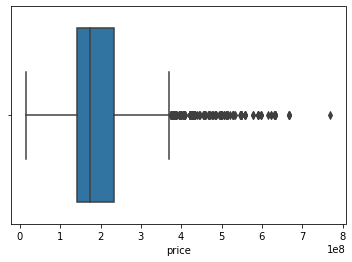

In [41]:
sns.boxplot(df2.price)

In [42]:
df2.price.std()

76121899.33046485

In [43]:
len(df2)

21243

In [44]:
# a new dataframe is created on the condition that price should be less than or equals to 500m and greather than or equals to 15m.
df3= df2[(df2.price<=500000000) & (df2.price>= 15000000)]
len(df3)

21165

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

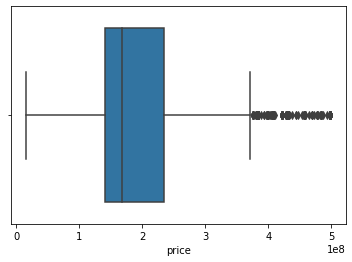

In [45]:
sns.boxplot(df3.price)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

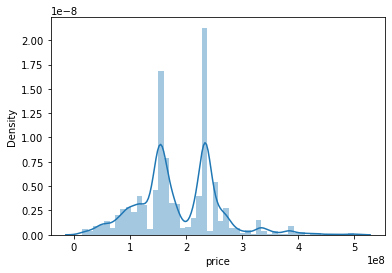

In [46]:
sns.distplot(df3.price)

In [47]:
df3.sample(4)

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
13454,5,5,6,4,Detached Duplex,Lekki,Lagos,300000000.0,234000000,750,110000000
2760,4,4,5,3,Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,80000000
18606,4,5,5,3,Terraced Duplexes,Katampe,Abuja,60000000.0,163800000,600,110000000
4862,2,2,2,3,Semi Detached Bungalow,Ajah,Lagos,16000000.0,47520000,300,35000000


In [48]:
df3.title.unique()

array(['Terraced Duplexes', 'Detached Duplex', 'Semi Detached Duplex',
       'Detached Bungalow', 'Block of Flats', 'Semi Detached Bungalow',
       'Terraced Bungalow'], dtype=object)

In [49]:
len(df3[df3.bedrooms==9])

100

In [50]:
len(df3)

21165

In [51]:
df3[df3.bedrooms == 9]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
183,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
360,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
366,9,9,1,8,Detached Duplex,Lekki,Lagos,250000000.0,370500000,1350,255000000
640,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
648,9,9,1,1,Detached Duplex,Maitama District,Abuja,700000000.0,427500000,1350,255000000
...,...,...,...,...,...,...,...,...,...,...,...
23519,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
23600,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
23846,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000
23888,9,9,1,1,Detached Duplex,Isolo,Lagos,70000000.0,342000000,1350,255000000


In [52]:
df3.town.unique()

array(['Katampe', 'Lekki', 'Ajah', 'Epe', 'Lokogoma District',
       'Victoria Island (VI)', 'Ikeja', 'Ikoyi', 'Magodo', 'Kaura',
       'Galadimawa', 'Gwarinpa', 'Lugbe District', 'Ibeju Lekki',
       'Ifako-Ijaiye', 'Agege', 'Ikorodu', 'Jahi', 'other',
       'Guzape District', 'Idu Industrial', 'Isheri North', 'Utako',
       'Kuje', 'Isheri', 'Life Camp', 'Ipaja', 'Isolo', 'Ojodu', 'Gaduwa',
       'Dakwo', 'Asokoro District', 'Alimosho', 'Wuye', 'Kubwa',
       'Shomolu', 'Ogudu', 'Surulere', 'Ayobo', 'Apo', 'Wuse 2', 'Durumi',
       'Mabushi', 'Ikotun', 'Maitama District', 'Maryland', 'Karsana',
       'Wuse', 'Kurudu', 'Karmo', 'Gbagada', 'Yaba', 'Gudu',
       'Mbora (Nbora)', 'Jabi', 'Ojo', 'Garki', 'Kado', 'Ilupeju', 'Ketu',
       'Karu', 'Kafe', 'Amuwo Odofin'], dtype=object)

In [53]:
df4 = df3[~(df3.town=='other')]

In [54]:
len(df4)

21008

In [55]:
df4.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,priceess,price,per_sqrmtr,prices
1,4,5,5,4,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,600,110000000
2,4,5,5,4,Detached Duplex,Lekki,Lagos,120000000.0,163800000,600,110000000
3,4,4,5,6,Detached Duplex,Ajah,Lagos,40000000.0,141120000,600,80000000
4,4,4,5,2,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,600,80000000
5,5,5,6,1,Detached Duplex,Lekki,Lagos,450000000.0,234000000,750,110000000


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

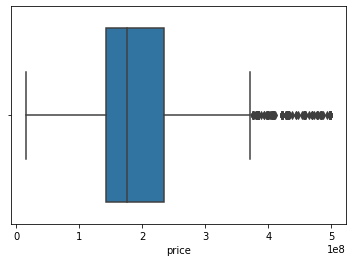

In [56]:
sns.boxplot(df4.price)

In [57]:
df5 = df4.drop(['toilets','parking_space','per_sqrmtr'], axis = 1)
df5.head()

,bedrooms,bathrooms,title,town,state,priceess,price,prices
1,4,5,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,110000000
2,4,5,Detached Duplex,Lekki,Lagos,120000000.0,163800000,110000000
3,4,4,Detached Duplex,Ajah,Lagos,40000000.0,141120000,80000000
4,4,4,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,80000000
5,5,5,Detached Duplex,Lekki,Lagos,450000000.0,234000000,110000000


In [58]:
len(df5)

21008

In [59]:
df5.price.max(), df5.price.min()

(498525000, 15000000)

In [60]:
df5.bedrooms.value_counts()

5    8524
4    7994
3    2248
6     975
2     687
1     237
7     194
9     100
8      49
Name: bedrooms, dtype: int64

In [61]:
df5[df5['bedrooms']==8].head()

,bedrooms,bathrooms,title,town,state,priceess,price,prices
1940,8,8,Detached Duplex,Maitama District,Abuja,1.100000e+09,351000000,210000000
2117,8,8,Detached Duplex,Ikeja,Lagos,6.500000e+08,327600000,210000000
2284,8,8,Detached Duplex,Victoria Island (VI),Lagos,1.100000e+09,397800000,210000000
2596,8,8,Detached Duplex,Ikeja,Lagos,1.000000e+08,397800000,210000000
2779,8,9,Block of Flats,Utako,Abuja,3.800000e+08,247000000,255000000


In [62]:
df6 = df5[~(df5.title=='Block of Flats')]

In [63]:
df6.head()

,bedrooms,bathrooms,title,town,state,priceess,price,prices
1,4,5,Terraced Duplexes,Katampe,Abuja,800000000.0,163800000,110000000
2,4,5,Detached Duplex,Lekki,Lagos,120000000.0,163800000,110000000
3,4,4,Detached Duplex,Ajah,Lagos,40000000.0,141120000,80000000
4,4,4,Semi Detached Duplex,Lekki,Lagos,75000000.0,152880000,80000000
5,5,5,Detached Duplex,Lekki,Lagos,450000000.0,234000000,110000000


In [64]:
df7= df6.drop(['priceess','prices'], axis = 1)

In [65]:
df7.head()

,bedrooms,bathrooms,title,town,state,price
1,4,5,Terraced Duplexes,Katampe,Abuja,163800000
2,4,5,Detached Duplex,Lekki,Lagos,163800000
3,4,4,Detached Duplex,Ajah,Lagos,141120000
4,4,4,Semi Detached Duplex,Lekki,Lagos,152880000
5,5,5,Detached Duplex,Lekki,Lagos,234000000


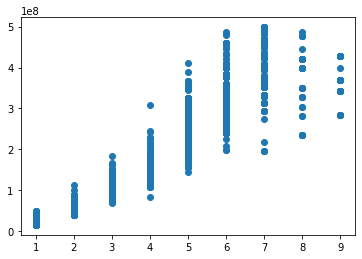

In [66]:
plt.scatter(df7.bedrooms,df7.price)
plt.show()

In [67]:
len(df7)

19893

In [68]:
df7.shape

(19893, 6)

In [69]:
df7.head()

,bedrooms,bathrooms,title,town,state,price
1,4,5,Terraced Duplexes,Katampe,Abuja,163800000
2,4,5,Detached Duplex,Lekki,Lagos,163800000
3,4,4,Detached Duplex,Ajah,Lagos,141120000
4,4,4,Semi Detached Duplex,Lekki,Lagos,152880000
5,5,5,Detached Duplex,Lekki,Lagos,234000000


### MODEL BUILLDING

In [70]:
df7.head()

,bedrooms,bathrooms,title,town,state,price
1,4,5,Terraced Duplexes,Katampe,Abuja,163800000
2,4,5,Detached Duplex,Lekki,Lagos,163800000
3,4,4,Detached Duplex,Ajah,Lagos,141120000
4,4,4,Semi Detached Duplex,Lekki,Lagos,152880000
5,5,5,Detached Duplex,Lekki,Lagos,234000000


In [71]:
df7.title.unique()

array(['Terraced Duplexes', 'Detached Duplex', 'Semi Detached Duplex',
       'Detached Bungalow', 'Semi Detached Bungalow', 'Terraced Bungalow'],
      dtype=object)

In [72]:
title= pd.get_dummies(df7.title)
title.head()

,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes
1,0,0,0,0,0,1
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0


In [73]:
town= pd.get_dummies(df7.town)
town.head()

,Agege,Ajah,Alimosho,Amuwo Odofin,Apo,Asokoro District,Ayobo,Dakwo,Durumi,Epe,...,Ojo,Ojodu,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
state=pd.get_dummies(df7.state)
state.head()

,Abuja,Lagos
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1


In [75]:
df8=pd.concat([df7,title,town,state],axis='columns')
df8.head()

,bedrooms,bathrooms,title,town,state,price,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4,5,Terraced Duplexes,Katampe,Abuja,163800000,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,5,Detached Duplex,Lekki,Lagos,163800000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,4,Detached Duplex,Ajah,Lagos,141120000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,4,Semi Detached Duplex,Lekki,Lagos,152880000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,5,5,Detached Duplex,Lekki,Lagos,234000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [76]:
df9=df8.drop(['title','town','state'],axis=1)
df9.head()

,bedrooms,bathrooms,price,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes,Agege,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4,5,163800000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,4,5,163800000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,4,141120000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,4,152880000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,5,234000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df9.shape

(19893, 73)

In [78]:
df10= df9.drop('Agege',axis='columns')

In [79]:
df10.shape

(19893, 72)

In [80]:
X= df10.drop('price', axis='columns')
X.head()

,bedrooms,bathrooms,Detached Bungalow,Detached Duplex,Semi Detached Bungalow,Semi Detached Duplex,Terraced Bungalow,Terraced Duplexes,Ajah,Alimosho,...,Shomolu,Surulere,Utako,Victoria Island (VI),Wuse,Wuse 2,Wuye,Yaba,Abuja,Lagos
1,4,5,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,4,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4,4,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,5,5,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
y= df10['price']
y.head()

1    163800000
2    163800000
3    141120000
4    152880000
5    234000000
Name: price, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.9325667267900175

In [84]:
def predict_price(title,town,state,bedrooms,bathrooms):
    title_index = np.where(X.columns==title)[0][0]
    town_index = np.where(X.columns==town)[0][0]
    state_index = np.where(X.columns==state)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = bedrooms
    x[0] = bathrooms
    if title_index >=0:
        x[title_index] = 1
        if town_index>=0:
            x[town_index]=1
            if state_index>=0:
                x[state_index]=1
        
    return lr.predict([x])[0]

In [85]:
predict_price('Detached Duplex','Ajah','Lagos',3,4)

78741504.0

In [89]:
predict_price('Terraced Duplexes','Ikeja','Lagos',5,6)

141361152.0

In [87]:
df6.title.value_counts()

Detached Duplex           12684
Terraced Duplexes          3103
Semi Detached Duplex       2461
Detached Bungalow          1251
Semi Detached Bungalow      298
Terraced Bungalow            96
Name: title, dtype: int64

In [88]:
df6.town.value_counts().head(20)

Lekki                   10392
Ajah                     1975
Ikoyi                    1378
Ikeja                     611
Ibeju Lekki               464
Victoria Island (VI)      405
Gwarinpa                  359
Magodo                    351
Life Camp                 276
Guzape District           258
Katampe                   238
Lokogoma District         213
Maitama District          183
Isheri North              177
Ikorodu                   166
Lugbe District            161
Wuye                      152
Isolo                     135
Apo                       134
Asokoro District          123
Name: town, dtype: int64